In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 20]

In [2]:
data = pd.read_excel('Week2_challenge_data_source.xlsx')
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Exploring the Data

In [3]:
data.shape

(150001, 55)

In [4]:
#statistical overview of the data
data.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [5]:
data.info()
#some columns have missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
#counting missing values in our dataframe
#both handset manufacturer and handset type have 572 missing values
data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# Pre-processing the Data

In [7]:
#converting identifiers to object type
data['IMSI'] = data['IMSI'].astype(str)
data['MSISDN/Number'] = data['MSISDN/Number'].astype(str)
data['IMEI'] = data['IMEI'].astype(str)
data['Last Location Name'] = data['Last Location Name'].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      150001 non-null  object        
 7   MSISDN/Number                             150001 non-null  object        
 8   IMEI                                      150001 non-null  object        
 9   Last Location N

In [8]:
#dealing with missing values
#columns with more than 60% missing data will be dropped

data.drop(['Nb of sec with 125000B < Vol DL',
           'Nb of sec with 1250B < Vol UL < 6250B',
           'Nb of sec with 31250B < Vol DL < 125000B',
           'Nb of sec with 37500B < Vol UL', 
           'Nb of sec with 6250B < Vol DL < 31250B',
           'Nb of sec with 6250B < Vol UL < 37500B',
           'TCP DL Retrans. Vol (Bytes)',
           'TCP UL Retrans. Vol (Bytes)',
           'HTTP DL (Bytes)',
           'HTTP UL (Bytes)'],axis=1,inplace=True)

#dropping the rows with missing values in the following sected columns
#these columns only had a single missing value
data.dropna(subset=['Start','Start ms','End','End ms','Dur. (ms)',
                    'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)',
                    'Activity Duration DL (ms)','Activity Duration UL (ms)',
                    'Dur. (ms).1','Total UL (Bytes)','Total DL (Bytes)'],inplace=True)

#The following columns are identifiers,hence need to be of type object.
#rows with missing data in those columns will be  dropped
data.dropna(subset=['IMSI','MSISDN/Number','IMEI'],inplace=True)

#The following columns are categories
#imputig with the most common class
data['Handset Manufacturer']=data['Handset Manufacturer'].fillna(data['Handset Manufacturer'].value_counts().index[0])
data['Handset Type']=data['Handset Type'].fillna(data['Handset Type'].value_counts().index[0])
data['Last Location Name']=data['Last Location Name'].fillna(data['Last Location Name'].value_counts().index[0])

data.isnull().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                    0
Avg RTT DL (ms)                   27828
Avg RTT UL (ms)                   27811
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 753
50 Kbps < DL TP < 250 Kbps (%)      753
250 Kbps < DL TP < 1 Mbps (%)       753
DL TP > 1 Mbps (%)                  753
UL TP < 10 Kbps (%)                 791
10 Kbps < UL TP < 50 Kbps (%)       791
50 Kbps < UL TP < 300 Kbps (%)      791
UL TP > 300 Kbps (%)                791
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [9]:
#replacing all tthe remaining missing values with their mean
data.fillna(data.mean(),inplace = True)

data.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

<AxesSubplot:>

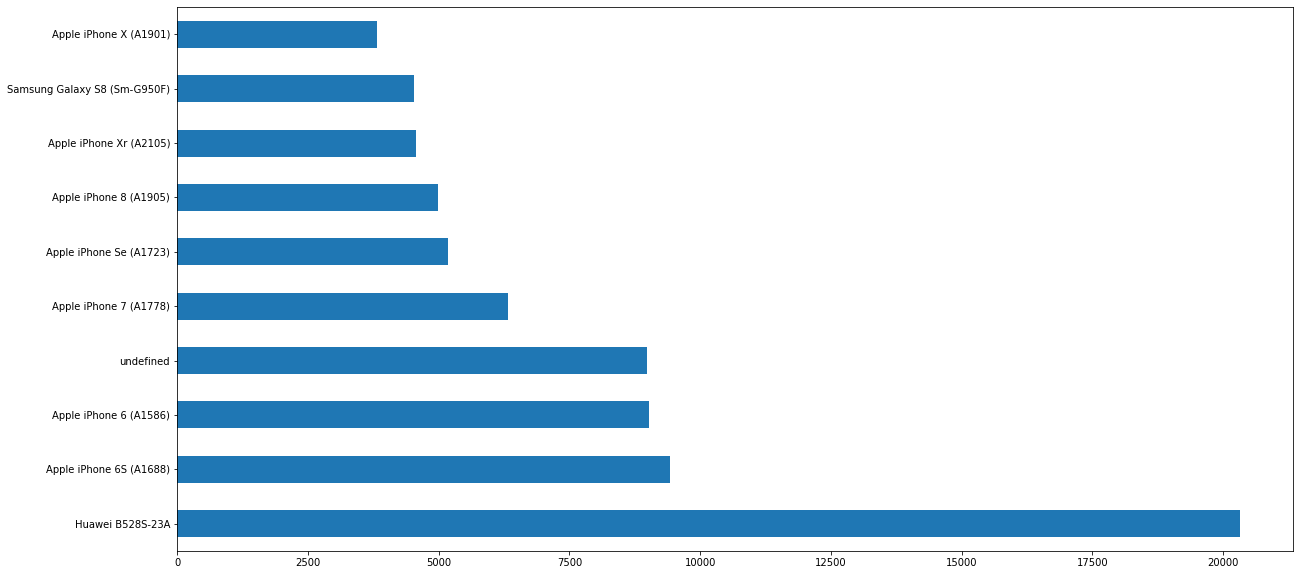

In [10]:
#Top 10 handset types
data['Handset Type'].value_counts().head(10).plot(kind='barh',figsize=(20,10))

In [11]:
data.shape

(150000, 45)

In [12]:

data3 = data.groupby("MSISDN/Number")["Bearer Id"].count()
data4 = data.groupby("MSISDN/Number")["Dur. (ms)"].sum()

data5 = data[['MSISDN/Number','Total UL (Bytes)','Total DL (Bytes)','Social Media DL (Bytes)',
              'Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
              'Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)',
              'Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)']]

data5['Total_Data'] = data5["Total UL (Bytes)"]+data5["Total DL (Bytes)"]
data5['Google_Data'] = data5['Google UL (Bytes)'] + data5['Google DL (Bytes)']
data5['Email_Data'] = data5['Email UL (Bytes)'] + data5['Email DL (Bytes)']
data5['Social_Media_Data'] = data5['Social Media UL (Bytes)'] + data5['Social Media DL (Bytes)']
data5['Youtube_Data'] = data5['Youtube UL (Bytes)'] + data5['Youtube DL (Bytes)']
data5['Netflix_Data'] = data5['Netflix UL (Bytes)'] + data5['Netflix DL (Bytes)']
data5['Gaming_Data'] = data5['Gaming UL (Bytes)'] + data5['Gaming DL (Bytes)']
data5['Other_Data'] = data5['Other UL (Bytes)'] + data5['Other DL (Bytes)']
#data5.head()
data6 = pd.merge(data4,data5,on="MSISDN/Number")
final_data = pd.merge(data3,data6,on="MSISDN/Number")
final_data.rename(columns = {"MSISDN/Number":"User_Id","Bearer Id":"Sessions_Count","Dur. (ms)":"Session_Duration"},inplace=True)
final_data.describe()

,Sessions_Count,Session_Duration,Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total_Data,Google_Data,Email_Data,Social_Media_Data,Youtube_Data,Netflix_Data,Gaming_Data,Other_Data
count,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,150000.00000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,...,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,9.408200,7.275360e+05,4.112121e+07,4.546434e+08,1.795322e+06,32928.43438,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,...,4.211005e+08,8.264799e+06,4.957646e+08,7.807295e+06,2.259102e+06,1.828250e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08
std,89.272904,6.078590e+06,1.127639e+07,2.441429e+08,1.035486e+06,19006.24161,3.309108e+06,1.189921e+06,1.035843e+06,269970.206933,...,2.432058e+08,4.769020e+06,2.443818e+08,3.516432e+06,1.071113e+06,1.035650e+06,9.246831e+06,9.260851e+06,2.440207e+08,2.432689e+08
min,1.000000,7.142000e+03,2.866892e+06,7.114041e+06,1.200000e+01,0.00000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,...,3.290000e+03,1.480000e+02,2.895611e+07,4.033000e+04,8.359000e+03,1.563000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05
25%,1.000000,8.631075e+04,3.322201e+07,2.431068e+08,8.991448e+05,16448.00000,2.882380e+06,1.024274e+06,8.927808e+05,233379.750000,...,2.101824e+08,4.145904e+06,2.844759e+08,4.943592e+06,1.359343e+06,9.322132e+05,1.599846e+07,1.597944e+07,2.187274e+08,2.185509e+08
50%,1.000000,1.398545e+05,4.114331e+07,4.558411e+08,1.794351e+06,32920.00000,5.765857e+06,2.054569e+06,1.793534e+06,466246.000000,...,4.218057e+08,8.267086e+06,4.968611e+08,7.812852e+06,2.263574e+06,1.826442e+06,2.266181e+07,2.263559e+07,4.316152e+08,4.299923e+08
75%,2.000000,2.533120e+05,4.903424e+07,6.657055e+08,2.694939e+06,49334.00000,8.623579e+06,3.088454e+06,2.689329e+06,700441.500000,...,6.316950e+08,1.238420e+07,7.065059e+08,1.068285e+07,3.159825e+06,2.727489e+06,2.929266e+07,2.929060e+07,6.414161e+08,6.399281e+08
max,1065.000000,7.244640e+07,7.833131e+07,9.029696e+08,3.586064e+06,65870.00000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,...,8.434425e+08,1.655882e+07,9.559848e+08,1.552878e+07,4.518036e+06,3.650861e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08


In [16]:
sessions_data = final_data[['Sessions_Count','Session_Duration']]
sessions_data.describe()

,Sessions_Count,Session_Duration
count,150000.000000,1.500000e+05
mean,9.408200,7.275360e+05
std,89.272904,6.078590e+06
min,1.000000,7.142000e+03
25%,1.000000,8.631075e+04
50%,1.000000,1.398545e+05
75%,2.000000,2.533120e+05
max,1065.000000,7.244640e+07


In [18]:
data_consumed = final_data[['Total UL (Bytes)','Total DL (Bytes)','Total_Data']]
data_consumed.describe()

,Total UL (Bytes),Total DL (Bytes),Total_Data
count,1.500000e+05,1.500000e+05,1.500000e+05
mean,4.112121e+07,4.546434e+08,4.957646e+08
std,1.127639e+07,2.441429e+08,2.443818e+08
min,2.866892e+06,7.114041e+06,2.895611e+07
25%,3.322201e+07,2.431068e+08,2.844759e+08
50%,4.114331e+07,4.558411e+08,4.968611e+08
75%,4.903424e+07,6.657055e+08,7.065059e+08
max,7.833131e+07,9.029696e+08,9.559848e+08


In [20]:
application_data = final_data[['Google_Data','Email_Data','Social_Media_Data','Youtube_Data','Netflix_Data','Gaming_Data','Other_Data']]
application_data.describe()

,Google_Data,Email_Data,Social_Media_Data,Youtube_Data,Netflix_Data,Gaming_Data,Other_Data
count,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,7.807295e+06,2.259102e+06,1.828250e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08
std,3.516432e+06,1.071113e+06,1.035650e+06,9.246831e+06,9.260851e+06,2.440207e+08,2.432689e+08
min,4.033000e+04,8.359000e+03,1.563000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05
25%,4.943592e+06,1.359343e+06,9.322132e+05,1.599846e+07,1.597944e+07,2.187274e+08,2.185509e+08
50%,7.812852e+06,2.263574e+06,1.826442e+06,2.266181e+07,2.263559e+07,4.316152e+08,4.299923e+08
75%,1.068285e+07,3.159825e+06,2.727489e+06,2.929266e+07,2.929060e+07,6.414161e+08,6.399281e+08
max,1.552878e+07,4.518036e+06,3.650861e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = data_consumed.Total_Data.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Your y-label')
plt.xlabel('Your x-label')
fig.set_xticklabels(application_data.columns, rotation = 45, ha="right")
plt.show()

ValueError: The number of FixedLocator locations (150000), usually from a call to set_ticks, does not match the number of ticklabels (7).

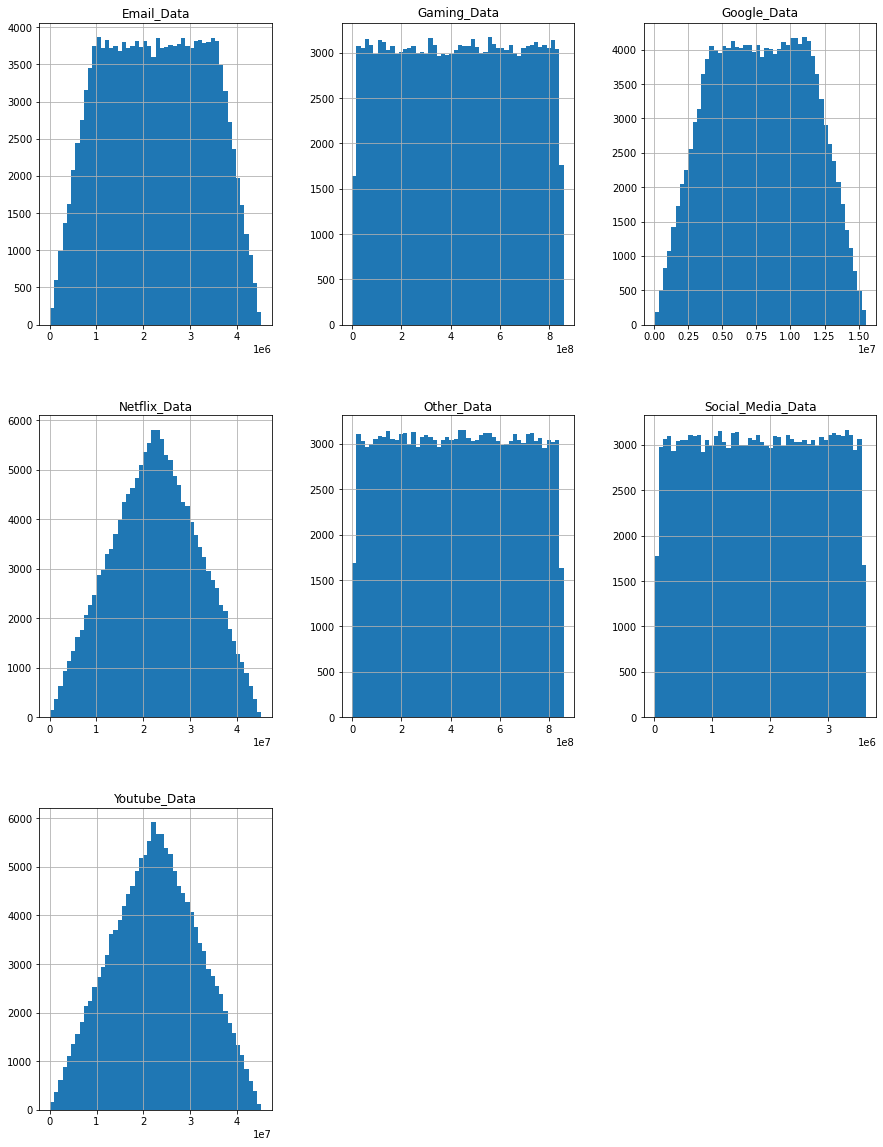

In [32]:

hist = application_data.hist(bins=50)

In [14]:
#checking for outliers using mathematical functions
#using interquatile range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Start ms                          4.990000e+02
End ms                            4.990000e+02
Dur. (ms)                         7.498975e+04
Avg RTT DL (ms)                   7.479571e+01
Avg RTT UL (ms)                   1.466288e+01
Avg Bearer TP DL (kbps)           1.966775e+04
Avg Bearer TP UL (kbps)           1.073000e+03
DL TP < 50 Kbps (%)               9.000000e+00
50 Kbps < DL TP < 250 Kbps (%)    4.000000e+00
250 Kbps < DL TP < 1 Mbps (%)     1.000000e+00
DL TP > 1 Mbps (%)                1.000000e+00
UL TP < 10 Kbps (%)               1.000000e+00
10 Kbps < UL TP < 50 Kbps (%)     0.000000e+00
50 Kbps < UL TP < 300 Kbps (%)    0.000000e+00
UL TP > 300 Kbps (%)              0.000000e+00
Activity Duration DL (ms)         6.647318e+05
Activity Duration UL (ms)         5.775555e+05
Dur. (ms).1                       7.499000e+07
Nb of sec with Vol DL < 6250B     2.677000e+03
Nb of sec with Vol UL < 1250B     2.453000e+03
Social Media DL (Bytes)           1.795794e+06
Social Media 

In [15]:
print(data.drop(['Start','End'],axis=1) < (Q1 - 1.5 * IQR)) |(data.drop(['Start','End'],axis=1) > (Q3 + 1.5 * IQR))

        10 Kbps < UL TP < 50 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
0                               False                          False   
1                               False                          False   
2                               False                          False   
3                               False                          False   
4                               False                          False   
...                               ...                            ...   
149995                          False                          False   
149996                          False                          False   
149997                          False                          False   
149998                          False                          False   
149999                          False                          False   

        50 Kbps < DL TP < 250 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                                False                       

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#convert all the handset manufacturers to lowercase
data['Handset Type']=data['Handset Type'].str.lower()